T       300 P       10.00
T       310 P       10.00
T       320 P       10.00
T       330 P       10.00
T       340 P       10.00
T       350 P       10.00
T       360 P       10.00
T       370 P       10.00
T       380 P       10.00
T       390 P       10.00
T       400 P       10.00
T       410 P       10.00
T       420 P       10.00
T       430 P       10.00
T       440 P       10.00
T       450 P       10.00
T       460 P       10.00
T       470 P       10.00
T       480 P       10.00
T       490 P       10.00
T       500 P       10.00
T       510 P       10.00
T       520 P       10.00
T       530 P       10.00
T       540 P       10.00
T       550 P       10.00
T       560 P       10.00
T       570 P       10.00
T       580 P       10.00
T       590 P       10.00
T       600 P       10.00
T       610 P       10.00
T       620 P       10.00
T       630 P       10.00
T       640 P       10.00
T       650 P       10.00
T       660 P       10.00
T       670 P       10.00
T       680 

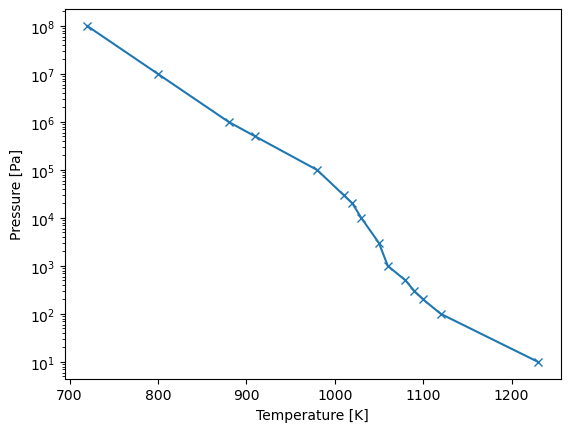

1)Finding the Explosion curve using the temperature difference  critera. If T_inital - T >10, then it is defined the explosion occurs, which also validated with the realtion using  concertation of C3H8. Also the we can find the explosion curve in the temperature between 600 -1200K

In [12]:


import numpy as np
import cantera as ct
import matplotlib.pyplot as plt
#import csv

# Input variables
fuel_species = 'C3H8'
npoints = 1 # Number of points to consider
# Pressures of interest
P = [10, 100, 200, 300, 500, 1000, 3000, 1e4, 2e4, 3e4, 1e5, 5e5, 1e6, 1e7, 1e8]
# Temperatures explosion occurs for each pressure
Temps = np.zeros(len(P))
Temps[0] = 1000
exploded = False

i = -1

for Pi in P:
    i += 1
    for Ti in range(600,1200,10):
        
        #Display
        print('T %9.f P %11.2f' % (Ti, Pi))
        dt = 1 # Time step size [s]
        time = 0.0 # Initial time of interest [s]
        
        # Set up the gas
        gas = ct.Solution('gri30.yaml')
        gas.set_equivalence_ratio(1.0, fuel_species, 'O2:1.0, N2:3.76')
        gas.TP = Ti, Pi
        
        # Create reactor containing the gas
        reac = ct.IdealGasConstPressureReactor(gas)
        # Add the reactor to a new ReactorNet simulator
        sim = ct.ReactorNet([reac])
        
        states = ct.SolutionArray(gas)
        ##############################################################################
        # For loop to advance in time n times
        for n in range(npoints):
            time += dt
            # Advance sim to specified time
            sim.advance(time)
            states.append(reac.thermo.state)
            if np.abs(Ti-gas.T)>10:
                exploded = True
                break
            
        if (exploded):
            exploded = False
            Temps[i] = Ti
            break




T       600 P       10.00
T       610 P       10.00
T       620 P       10.00
T       630 P       10.00
T       640 P       10.00
T       650 P       10.00
T       660 P       10.00
T       670 P       10.00
T       680 P       10.00
T       690 P       10.00
T       700 P       10.00
T       710 P       10.00
T       720 P       10.00
T       730 P       10.00
T       740 P       10.00
T       750 P       10.00
T       760 P       10.00
T       770 P       10.00
T       780 P       10.00
T       790 P       10.00
T       800 P       10.00
T       810 P       10.00
T       820 P       10.00
T       830 P       10.00
T       840 P       10.00
T       850 P       10.00
T       860 P       10.00
T       870 P       10.00
T       880 P       10.00
T       890 P       10.00
T       900 P       10.00
T       910 P       10.00
T       920 P       10.00
T       930 P       10.00
T       940 P       10.00
T       950 P       10.00
T       960 P       10.00
T       970 P       10.00
T       980 

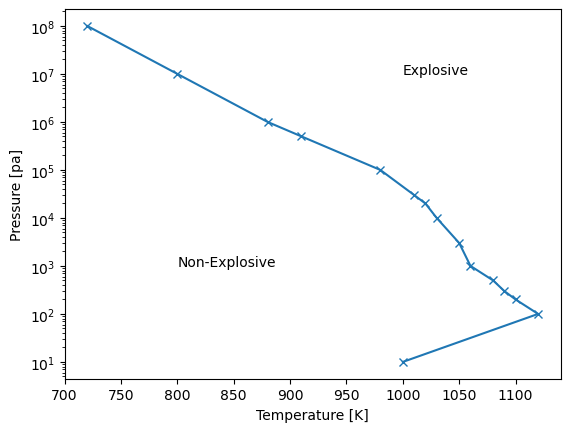

In [17]:

plt.plot(Temps,P,'x-')
plt.text(800,10**3,'Non-Explosive')
plt.text(1000,10**7,'Explosive')
plt.xlabel('Temperature [K]')
plt.ylabel('Pressure [pa]')
plt.yscale('log')


2) Temperature for time for some cases,  Induction time is calculated as the time at which the gradient of temperature with respect to time is max.

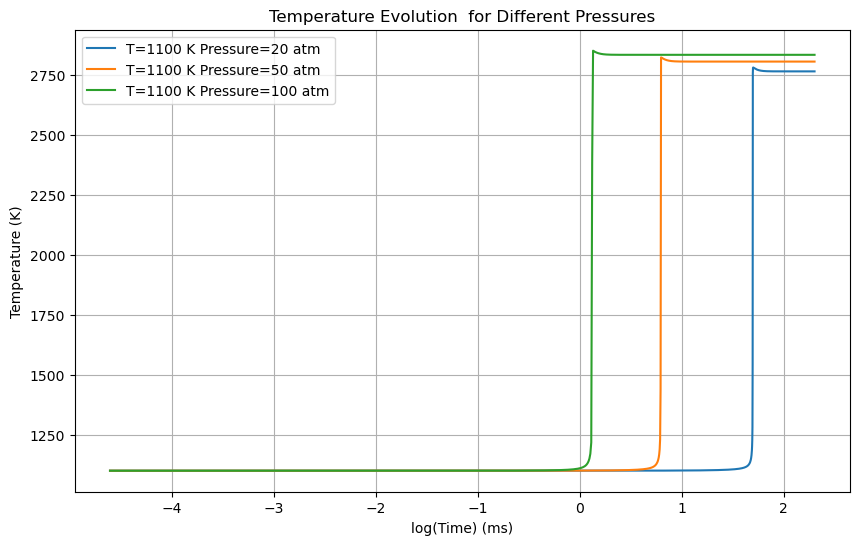

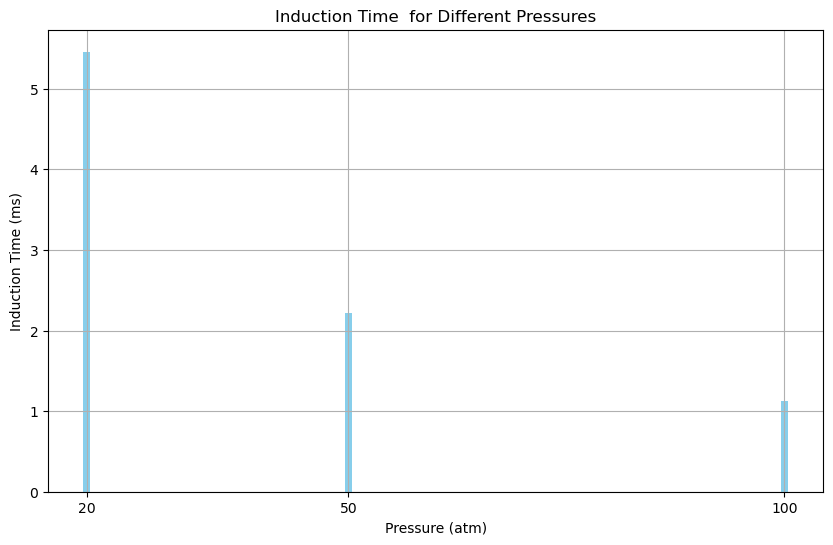

In [14]:



fixed_temperature = 1100  # K
pressures = [20, 50,100]  # atm

# Initialize list to store induction times
induction_times = []


plt.figure(figsize=(10, 6))

for p in pressures:
    gas = ct.Solution('gri30.yaml')
    fuel_species = 'C3H8'
    gas.set_equivalence_ratio(1.0, fuel_species, 'O2:1.0, N2:3.76')
    
    # Set temperature and pressure
    gas.TP = fixed_temperature, p * ct.one_atm  # Convert atm to Pa
    
  
    r = ct.IdealGasConstPressureReactor(gas)
    sim = ct.ReactorNet([r])
    
    
    time = 0.0
    dt = 1e-05
    ntimes = 1000
    
    states = ct.SolutionArray(gas, extra=['t'])
    
    gradT = np.zeros(ntimes)
    T_before = fixed_temperature
    
    # Induction time tracking
    induction_time = None

    # Advance the simulation
    for n in range(ntimes):
        time += dt
        sim.advance(time)
        states.append(r.thermo.state, t=time * 1e3)  # in ms

        # Calculate the temperature gradient
        gradT[n] = np.abs(T_before - gas.T) / dt
        T_before = gas.T

    # Identify the induction time as the time when the temperature gradient is maximum
    induction_time = states.t[np.argmax(gradT)]

    
    plt.plot(np.log(states.t), states.T, label=f'T={fixed_temperature} K Pressure={p} atm')

    
    induction_times.append(induction_time)





# Add plot labels and title for temperature evolution
plt.xlabel('log(Time) (ms)')
plt.ylabel('Temperature (K)')
plt.title('Temperature Evolution  for Different Pressures')
plt.legend()
plt.grid()
plt.show()

# New figure for induction times
plt.figure(figsize=(10, 6))
plt.bar(pressures, induction_times, color='skyblue')
plt.xlabel('Pressure (atm)')
plt.ylabel('Induction Time (ms)')
plt.title('Induction Time  for Different Pressures')
plt.xticks(pressures)
plt.grid()
plt.show()


3) Plots for showing the reaction zone with normalized mole fraction for T=1100K and P=10 atm

In [15]:
# gas.TP = 1100.0, 20*ct.one_atm
# r = ct.IdealGasConstPressureReactor(gas)

# sim = ct.ReactorNet([r])
# time = 0.0
# states = ct.SolutionArray(gas, extra=['t'])


# print('%10s %10s %10s %14s' % ('t [s]','T [K]','P [Pa]','u [J/kg]'))
# npoints =1000

# for n in range(npoints):
#     time += 1.e-5
#     sim.advance(time)
#     states.append(r.thermo.state, t=time*1e3)
#     print('%10.3e %10.f %10.f %14.6e' % (sim.time, r.T,
#                                           r.thermo.P, r.thermo.u))
    
# # plt.plot(np.log(states.t), np.log(states.X[:,gas.species_index('OH')]),label=f'OH')


# # plt.plot(np.log(states.t), np.log(states.X[:,gas.species_index('H')]),label=f'H')

# # plt.plot(np.log(states.t), np.log(states.X[:,gas.species_index('C3H8')]),label=f'C3H8')

    

# plt.plot(np.log(states.t), states.X[:,gas.species_index('OH')],label=f'OH')

# plt.figure()
# plt.plot(np.log(states.t), states.X[:,gas.species_index('H')],label=f'H')
# plt.figure()
# plt.plot(np.log(states.t), states.X[:,gas.species_index('C3H8')],label=f'C3H8')

# plt.figure()
# plt.plot(np.log(states.t), states.X[:,gas.species_index('CO')],label=f'CO')

# plt.figure()
# plt.plot(np.log(states.t), states.X[:,gas.species_index('NO')],label=f'NO')



     t [s]      T [K]     P [Pa]       u [J/kg]
 1.000e-05       1000    2026500  -2.331229e+06
 2.000e-05       1000    2026500  -2.331230e+06
 3.000e-05       1000    2026500  -2.331231e+06
 4.000e-05       1000    2026500  -2.331232e+06
 5.000e-05       1000    2026500  -2.331233e+06
 6.000e-05       1000    2026500  -2.331234e+06
 7.000e-05       1000    2026500  -2.331235e+06
 8.000e-05       1000    2026500  -2.331235e+06
 9.000e-05       1000    2026500  -2.331236e+06
 1.000e-04       1000    2026500  -2.331237e+06
 1.100e-04       1000    2026500  -2.331238e+06
 1.200e-04       1000    2026500  -2.331239e+06
 1.300e-04       1000    2026500  -2.331239e+06
 1.400e-04       1000    2026500  -2.331240e+06
 1.500e-04       1000    2026500  -2.331241e+06
 1.600e-04       1000    2026500  -2.331242e+06
 1.700e-04       1000    2026500  -2.331243e+06
 1.800e-04       1000    2026500  -2.331243e+06
 1.900e-04       1000    2026500  -2.331244e+06
 2.000e-04       1000    2026500  -2.331

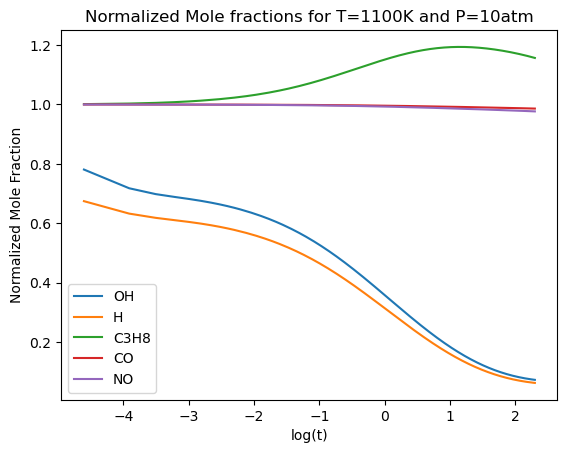

In [23]:
gas.TP = 1000.0, 20*ct.one_atm  # Set temperature and pressure
r = ct.IdealGasConstPressureReactor(gas)

sim = ct.ReactorNet([r])
time = 0.0
states = ct.SolutionArray(gas, extra=['t'])

# Print header
print('%10s %10s %10s %14s' % ('t [s]', 'T [K]', 'P [Pa]', 'u [J/kg]'))

npoints = 1000

# Capture initial species concentrations for normalization
initial_OH = gas['OH'].X[0]
initial_H = gas['H'].X[0]
initial_C3H8 = gas['C3H8'].X[0]
initial_CO = gas['CO'].X[0]
initial_NO = gas['NO'].X[0]

# Reactor simulation
for n in range(npoints):
    time += 1.e-5
    sim.advance(time)
    states.append(r.thermo.state, t=time*1e3)
    print('%10.3e %10.f %10.f %14.6e' % (sim.time, r.T, r.thermo.P, r.thermo.u))

# Normalized plots
plt.plot(np.log(states.t), states.X[:, gas.species_index('OH')] / initial_OH, label='OH')
plt.plot(np.log(states.t), states.X[:, gas.species_index('H')] / initial_H, label='H')
plt.plot(np.log(states.t), states.X[:, gas.species_index('C3H8')] / initial_C3H8, label='C3H8')
plt.plot(np.log(states.t), states.X[:, gas.species_index('CO')] / initial_CO, label='CO')
plt.plot(np.log(states.t), states.X[:, gas.species_index('NO')] / initial_NO, label='NO')

# Adding labels and legend
plt.xlabel('log(t)')
plt.ylabel('Normalized Mole Fraction')
plt.title('Normalized Mole fractions for T=1100K and P=10atm')
plt.legend()
plt.show()